### Installing all pre-requisites packages

In [ ]:
#Source - https://pypi.org/project/pip/
pip install seaborn matplotlib scikit-learn numpy pandas



### Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

### Reading the dataset using Pandas

In [ ]:
customer_dataset = pd.read_csv('./customer-segmentation-dataset/Mall_Customers.csv')

#### Let's get familiar with data in depth

In [ ]:
# Checking first 10 rows of dataset for getting data familarity
customer_dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
customer_dataset.shape

(200, 5)

In [ ]:
customer_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Checking datatypes of Columns present in sheet
customer_dataset.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
label                      int32
dtype: object

In [ ]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# check any null values present in the dataset:

customer_dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
label                     0
dtype: int64

### Let's drop column CustomerID as it will not help us in building customer segmentation

In [ ]:
customer_dataset.drop(['CustomerID'], axis = 1, inplace= True)
customer_dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Checking Age Frequency Distribution In Given Dataset

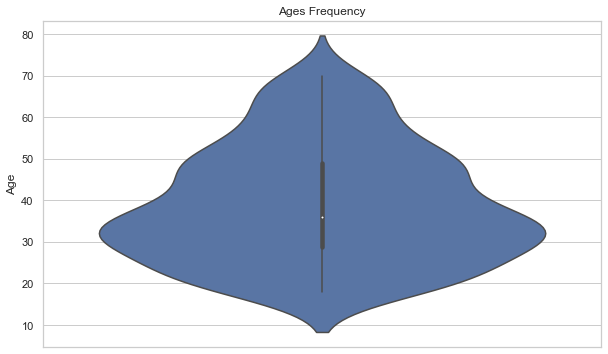

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=customer_dataset["Age"])
plt.show()


### Displot for Age, Annual Income and Spending Score

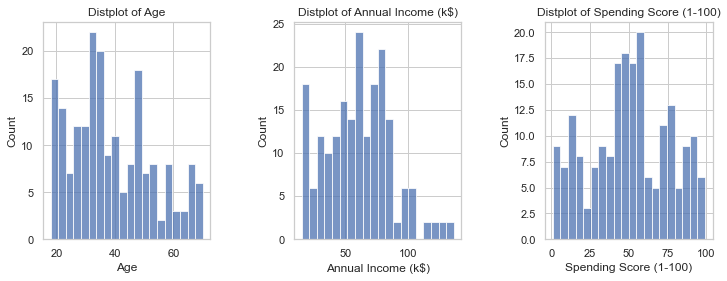

In [ ]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.histplot(customer_dataset[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

### Boxplot for Spending Score & Annual Income

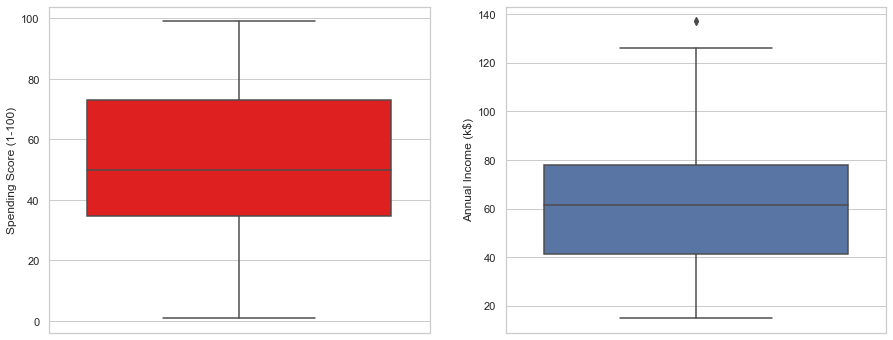

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=customer_dataset["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=customer_dataset["Annual Income (k$)"])
plt.show()

### Female VS Male (Customer)

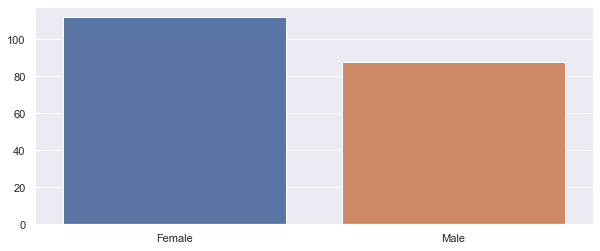

In [ ]:
genders = customer_dataset.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Violin Plot for  Age, Annual Income and Spending Score

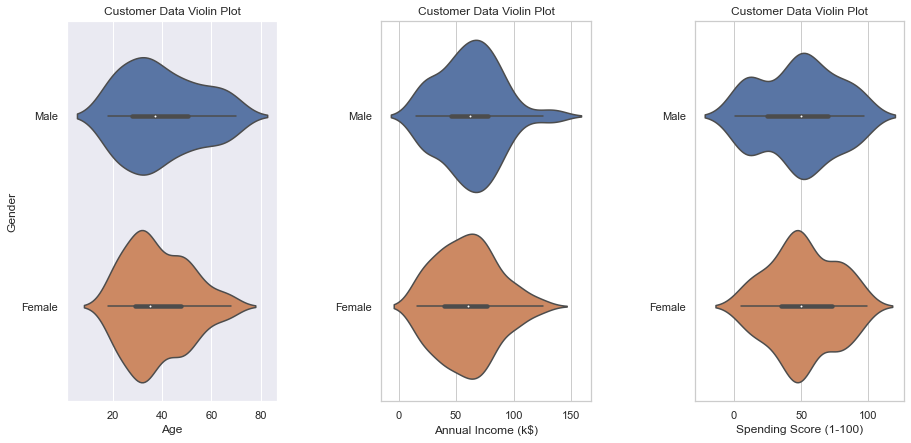

In [ ]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.violinplot(x = cols,y = 'Gender', data = customer_dataset)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Customer Data Violin Plot')
plt.show()

### Grouping customers based on Age range

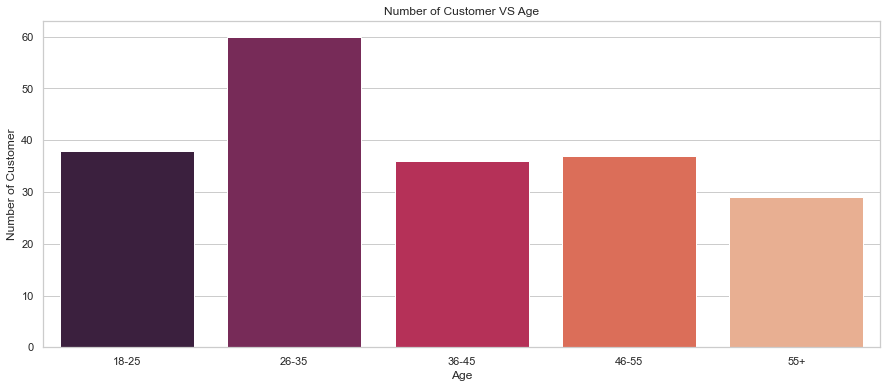

In [ ]:
age18_25 = customer_dataset.Age[(customer_dataset.Age <= 25) & (customer_dataset.Age >= 18)]
age26_35 = customer_dataset.Age[(customer_dataset.Age <= 35) & (customer_dataset.Age >= 26)]
age36_45 = customer_dataset.Age[(customer_dataset.Age <= 45) & (customer_dataset.Age >= 36)]
age46_55 = customer_dataset.Age[(customer_dataset.Age <= 55) & (customer_dataset.Age >= 46)]
age55above = customer_dataset.Age[customer_dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer VS Age")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


### No. of customers having the Score VS Score range

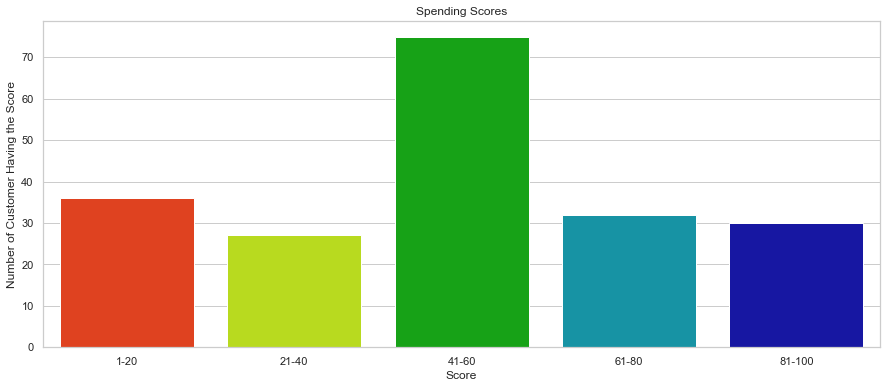

In [ ]:
ss1_20 = customer_dataset["Spending Score (1-100)"][(customer_dataset["Spending Score (1-100)"] >= 1) & (customer_dataset["Spending Score (1-100)"] <= 20)]
ss21_40 = customer_dataset["Spending Score (1-100)"][(customer_dataset["Spending Score (1-100)"] >= 21) & (customer_dataset["Spending Score (1-100)"] <= 40)]
ss41_60 = customer_dataset["Spending Score (1-100)"][(customer_dataset["Spending Score (1-100)"] >= 41) & (customer_dataset["Spending Score (1-100)"] <= 60)]
ss61_80 = customer_dataset["Spending Score (1-100)"][(customer_dataset["Spending Score (1-100)"] >= 61) & (customer_dataset["Spending Score (1-100)"] <= 80)]
ss81_100 = customer_dataset["Spending Score (1-100)"][(customer_dataset["Spending Score (1-100)"] >= 81) & (customer_dataset["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

### No. of customers VS Income($)

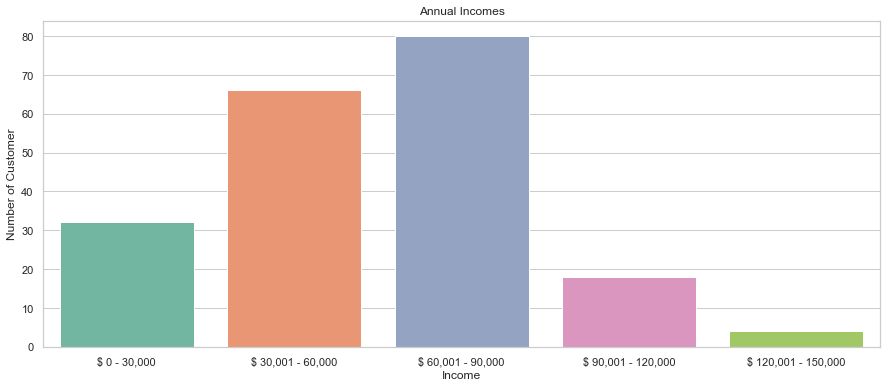

In [ ]:
ai0_30 = customer_dataset["Annual Income (k$)"][(customer_dataset["Annual Income (k$)"] >= 0) & (customer_dataset["Annual Income (k$)"] <= 30)]
ai31_60 = customer_dataset["Annual Income (k$)"][(customer_dataset["Annual Income (k$)"] >= 31) & (customer_dataset["Annual Income (k$)"] <= 60)]
ai61_90 = customer_dataset["Annual Income (k$)"][(customer_dataset["Annual Income (k$)"] >= 61) & (customer_dataset["Annual Income (k$)"] <= 90)]
ai91_120 = customer_dataset["Annual Income (k$)"][(customer_dataset["Annual Income (k$)"] >= 91) & (customer_dataset["Annual Income (k$)"] <= 120)]
ai121_150 = customer_dataset["Annual Income (k$)"][(customer_dataset["Annual Income (k$)"] >= 121) & (customer_dataset["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

### Creating Clusters based on Age and Spending Score

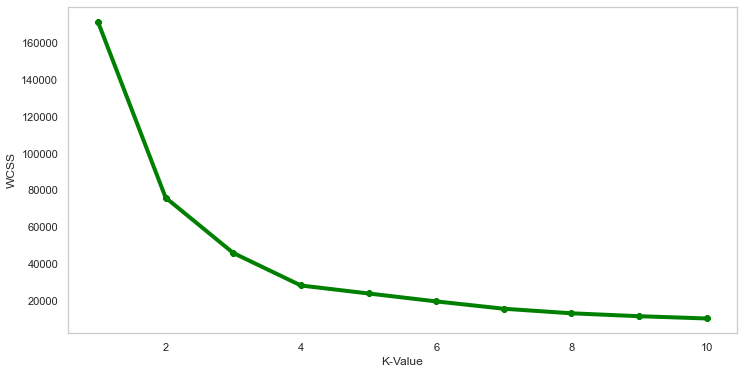

In [ ]:

X1 = customer_dataset.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 4, color = 'green', marker = '8')
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)

print(label)
print("-----------------------------------------")
print(kmeans.cluster_centers_)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
-----------------------------------------
[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


### Scatter plot : Age VS Spending Score

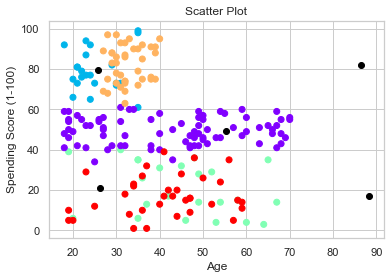

In [ ]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Creating Clusters based on Annual Income and Spending Score

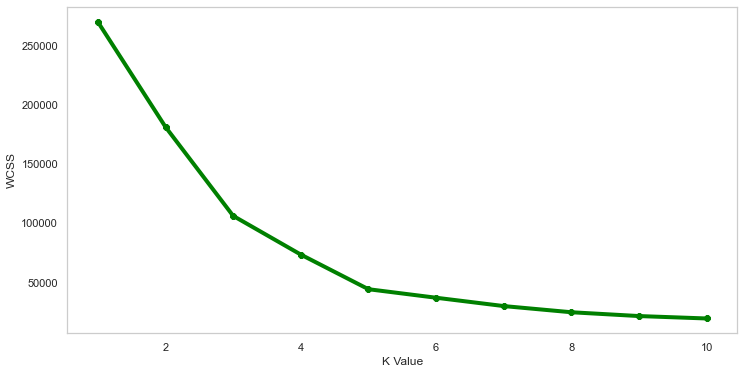

In [ ]:

X2 = customer_dataset.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 4, color = 'green', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)

print(label)
print("-------------------------------------------")
print(kmeans.cluster_centers_)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 4 3 0 3 4 3 4 3 0 3 4 3 4 3 4 3 4 3 0 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]
-------------------------------------------
[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]


### Scatter Plot: Spending Score VS Annual Income

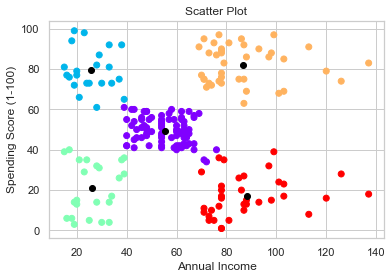

In [ ]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Scatter Plot')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Creating a Clusters based on Age, Annual Income, and Spending Score

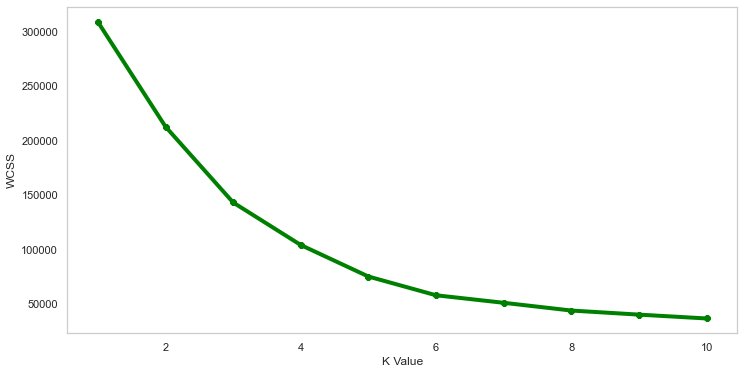

In [ ]:

X3 = customer_dataset.iloc[:,1:]

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 4, color = 'green', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)

print(label)
print("-----------------------------")
print(kmeans.cluster_centers_)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
-----------------------------
[[25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


### 3D Scatter Plot: Age, Annual Income & Spending Score

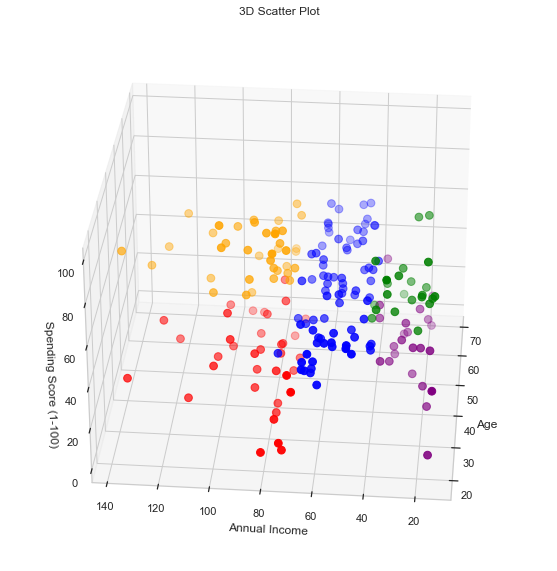

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(X3)
customer_dataset['label'] = clusters


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(customer_dataset.Age[customer_dataset.label == 0], customer_dataset['Annual Income (k$)'][customer_dataset.label == 0], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 0], c = 'blue', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 1], customer_dataset['Annual Income (k$)'][customer_dataset.label == 1], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 1], c = 'red', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 2], customer_dataset['Annual Income (k$)'][customer_dataset.label == 2], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 2], c = 'green', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 3], customer_dataset['Annual Income (k$)'][customer_dataset.label == 3], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 3], c = 'orange', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 4], customer_dataset['Annual Income (k$)'][customer_dataset.label == 4], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)

plt.title('3D Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

#### Summary: As per the final 3D scatter plot, we can see the customer segmentation has been applied based on Age, Annual Income & Spending Score.

#### Now, this approach helps company or business to target their customers based on their behaviour and interest. Ex - Cross-Sell, Upsell, Offers & Discount